In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pylab as pltl
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

%matplotlib inline


pandas will recognize only 'NA' as missing value. So we include the formats of missing values while reading the file so that pandas can recognize those formats as missing values

In [2]:
#load the data set
missing_values = ["n/a", "na", "--",'?','[]']
train_data = pd.read_csv("Datasets/HousePrediction/train.csv")
test_data = pd.read_csv("Datasets/HousePrediction/test.csv")

In [3]:
#display the first five columns of train data
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("train data :",train_data.shape)

train data : (1460, 81)


training data has 1460 rows and 81 columns out of which 80 are independent variables and one variable (SalePrice) is dependent variable

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

out of 81 variables, 38 are numerical variables and 43 are categorical variables

In [6]:
#check for missing values
miss_values=train_data.isnull().sum()/len(train_data)
miss_values=miss_values[miss_values>0]
miss_values.sort_values(inplace=True)

#print only columns having missed values
print("missing values in each column : \n",miss_values)


missing values in each column : 
 Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64


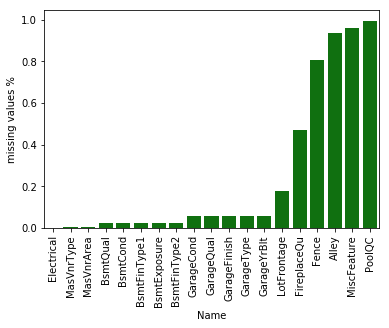

In [7]:
#display the missing values
miss_plot=sns.barplot(x=miss_values.index,y=miss_values.values,color='green')
miss_plot.set(xlabel='Name',ylabel='missing values %')
pltl.xticks(rotation=90)
pltl.show()


From the above plot, we can say that the variable 'PoolQC' has highest number of missing values followed by MiscFeature,Alley,Fence.

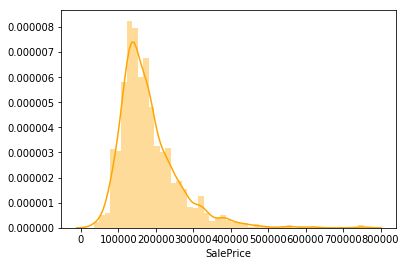

In [8]:
#Analyse target(dependent) variable

sns.distplot(train_data['SalePrice'],kde=True,color='orange')

In [9]:
#skewness of target variable

SalePrice_skew = train_data['SalePrice'].skew()
SalePrice_kurt = train_data['SalePrice'].kurt()

print("Skewness of target varibale 'SalePrice' is :",SalePrice_skew)
print("Kurtisis of target varibale 'SalePrice' is :",SalePrice_kurt)


Skewness of target varibale 'SalePrice' is : 1.8828757597682129
Kurtisis of target varibale 'SalePrice' is : 6.536281860064529


From the distribution plot of the target variable, we can observe that the distribution is positively skewed.
And also the skewness is 1.88288 which is greater than 1 i.e. positively skewed.
Kurtosis is greater than 3 which implies there are outliers in the distribution

We will make this positively skewed distribution to mormal distribution by applying log tranform. Because regression algorithms assume that residuals(difference between actual and predicted) follow a normal distribution. And also a normal distribution helps in better modeling.Taking the logarithm from our target variable, we obtain something similar to a Gaussian distribution. This will ensure that relative errors for cheaper and more expensive homes are treated on an equal footing.

Skewness of the target variable after tranforming to normal distribution :  0.12133506220520406
Kurtosis of the target variable after tranforming to normal distribution :  0.8095319958036296


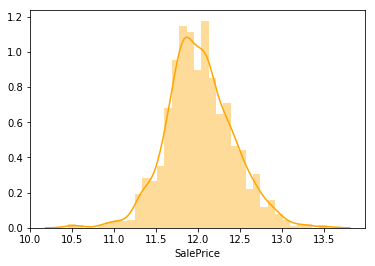

In [10]:
#transform to normal distribution
SalePrice_norm = np.log(train_data['SalePrice'])
SalePrice_norm_skew = SalePrice_norm.skew()
print("Skewness of the target variable after tranforming to normal distribution : ", SalePrice_norm_skew)
print("Kurtosis of the target variable after tranforming to normal distribution : ", SalePrice_norm.kurt())
sns.distplot(SalePrice_norm,kde=True,color='orange')

In [11]:
#Analyse the numerical and categorical data separately

numerical_data = train_data.select_dtypes(include=[np.number])
Categorical_data = train_data.select_dtypes(exclude=[np.number])


we can remove the column 'Id' from the numerical data columns because the value if ID does not impact the SalePrice (target variable)

In [12]:
del numerical_data['Id']

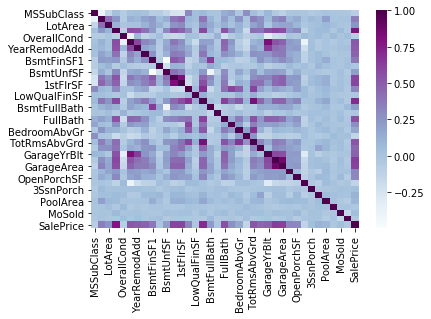

In [13]:
# correlation plot for numerical data

num_corr = numerical_data.corr()
sns.heatmap(num_corr,cmap='BuPu',linecolor='white')

In [14]:
print (num_corr['SalePrice'].sort_values(ascending=False)[:15], '\n')#values correlated with target(first 15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 



From the heatmap and correlation values, we can see that the variable 'OverallQual' is more correlated with SalePrice.This means that if the quality of the house is more then SalePrice of the house will also be more.

In [15]:
print (num_corr['SalePrice'].sort_values(ascending=False)[-15:], '\n')#values correlated with target(last 15)

BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



These values are negatively correlated with the target variable which means that increase in these variables will result in decrease of the saleprice of the house

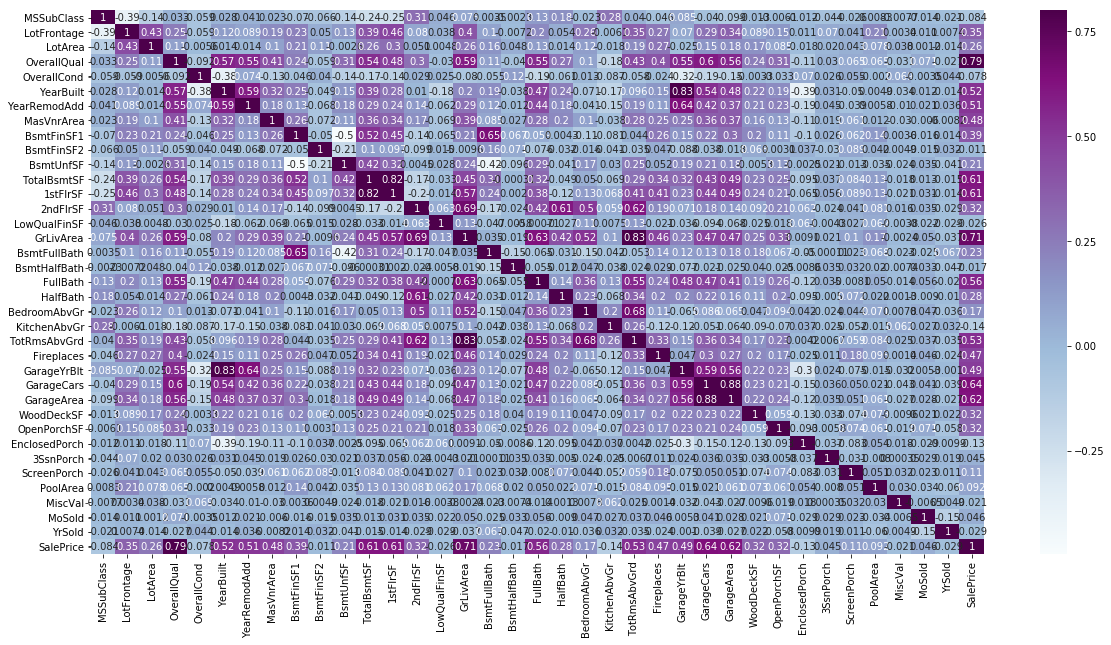

In [16]:
# plot the magnified version of heatmap with correlation values

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(num_corr,cmap='BuPu',linecolor='white', vmax=.8,annot_kws={'size': 10}, annot=True);

From the correlation matrix we find that few variables are strongly correlated with the target(SalePrice). This means that if any of these variable increase then SalePrice of the house also increase. Let us consider the first 10 highly correlated variables and analyse them


OverallQual - Rates the overall material and finish of the house  (measred by scale of 1(VeryPoor)-10(Very Excellent)

GrLivArea   -  Above grade (ground) living area square feet   

GarageCars  -  Size of garage in car capacity   

GarageArea  -  Size of garage in square feet   

TotalBsmtSF -  Total square feet of basement area   

1stFlrSF    -  First Floor square feet    

FullBath    -  Full bathrooms above grade    

TotRmsAbvGrd - Total rooms above grade (does not include bathrooms)  

YearBuilt   -  Original construction date

YearRemodAdd - Remodel date (same as construction date if no remodeling or additions)


It can be observed that few independent variables are strongly correlated with each other (multicollinearity).

'GarageCars' and 'GarageArea' are highly correlated (0.88).This leads to redundancy and it is waste of keeping both the variables.So we can remove one of them.We will keep 'GarageCars' since its correlation with SalePrice is higher than that of 'GarageArea'

'TotalBsmtSF' and '1stFloor' are highly correlated(0.82).We can keep TotalBsmtSF.

'TotRmsAbvGrd' and 'GrLivArea' have a correlation of 0.83.We keep 'GrLivArea'



#### OverallQual vs SalePrice

'OverallQual' is an ordinal variable ranging from 1 to 10. We will compare this variable with median of Saleprice because the target variable 'SalePrice' which means that it has outliers and median is not sensitive to outliers unlike mean.

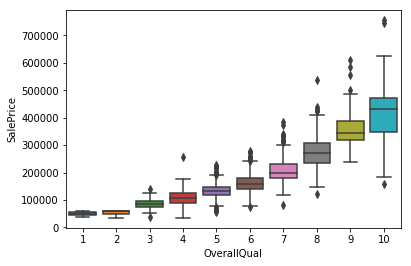

In [17]:
sns.boxplot(x='OverallQual',y='SalePrice',data=train_data)

From the box plot, we can observe outliers where few houses having very excellent overall quality of the house have low price.
And also the houses with less quality have more price compared to the houses with more quality(for example observe the outliers in saleprice  for Overallquality 3 and 4)

In [18]:
#plot against median saleprice

Qual_pivot=train_data.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)


Text(0, 0.5, 'Median SalePrice')

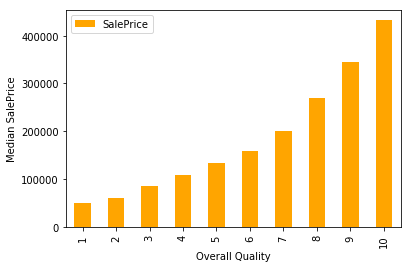

In [19]:
Qual_pivot.plot(kind='bar',color='orange')
plt.xlabel('Overall Quality')
plt.ylabel('Median SalePrice')

From this plot, We can observe that as the Overall quality of the house increases ,the huse becomes more expensive which is practically true.

C:\Users\alekh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\alekh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\alekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\alekh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


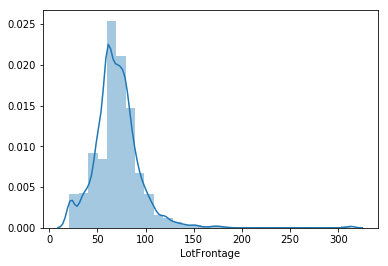

In [20]:
sns.distplot(train_data['LotFrontage'],kde=True,bins=30)


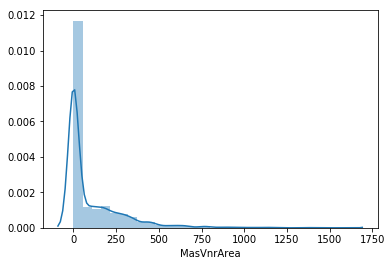

In [21]:
sns.distplot(train_data['MasVnrArea'],kde=True,bins=30)

The variables 'LotFrontage' and 'MasVnrArea' are skewed to right.

#### GrLivArea vs SalePrice

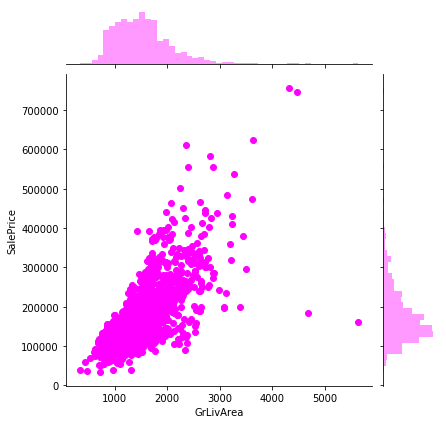

In [22]:
sns.jointplot(x=train_data['GrLivArea'],y=train_data['SalePrice'],color='magenta')



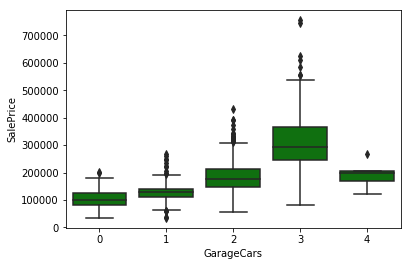

In [23]:
sns.boxplot(x=train_data['GarageCars'],y=train_data['SalePrice'],color='green')

We can observe that as the ground living area is more the house becomes expensive.We can also see some outliers which impact the performance of the model.We can handle the outliers in later sections.

Same relation is observed between GarageCars and SalePrice.

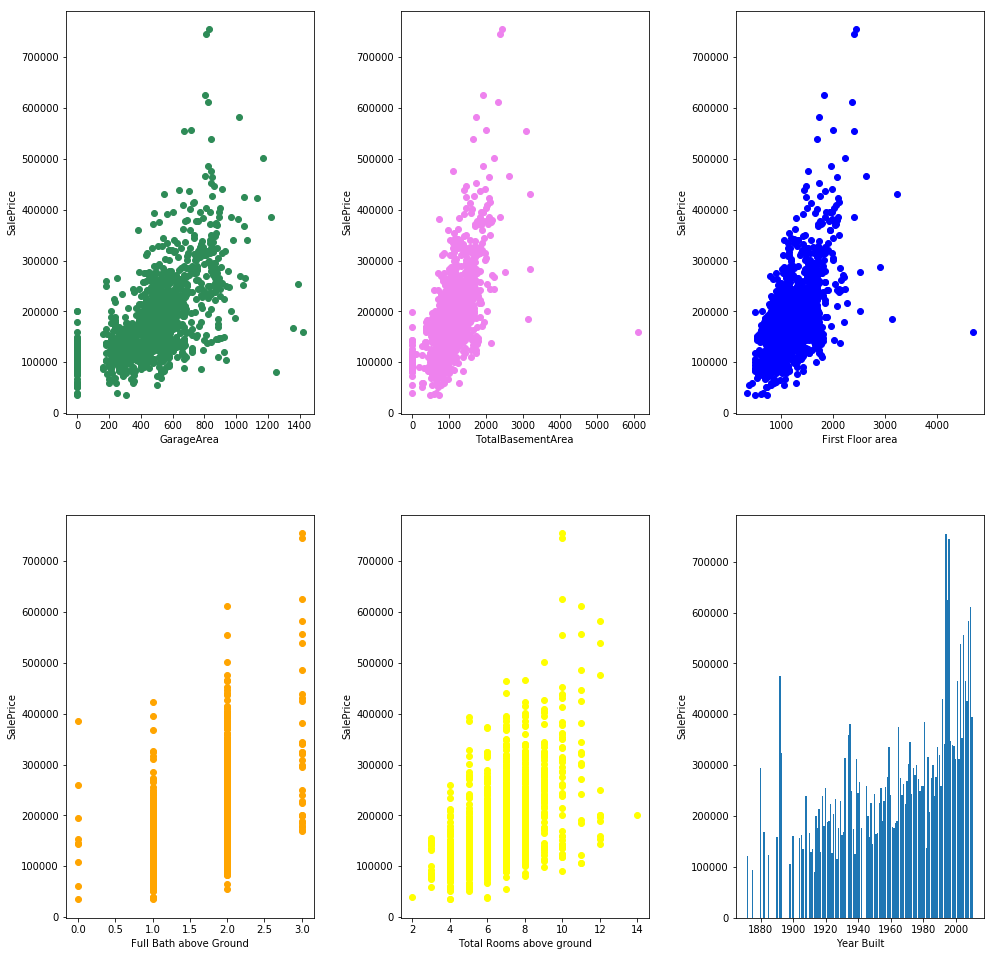

In [24]:
plt.subplots(2,3,figsize=(15,15))
plt.subplot(2,3,1)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.scatter(train_data['GarageArea'],train_data['SalePrice'],c='seagreen')

plt.subplot(2,3,2)
plt.xlabel('TotalBasementArea')
plt.ylabel('SalePrice')
plt.scatter(train_data['TotalBsmtSF'],train_data['SalePrice'],c='violet')

plt.subplot(2,3,3)
plt.xlabel('First Floor area')
plt.ylabel('SalePrice')
plt.scatter(train_data['1stFlrSF'],train_data['SalePrice'],c='blue')

plt.subplot(2,3,4)
plt.xlabel('Full Bath above Ground')
plt.ylabel('SalePrice')
plt.scatter(train_data['FullBath'],train_data['SalePrice'],c='orange')


plt.subplot(2,3,5)
plt.xlabel('Total Rooms above ground')
plt.ylabel('SalePrice')
plt.scatter(train_data['TotRmsAbvGrd'],train_data['SalePrice'],c='yellow')

plt.subplot(2,3,6)
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.bar(train_data['YearBuilt'],train_data['SalePrice'])


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


To understand the correlations between catogorical variables and target variable and the influence of the variables on target variable , we can ANOVA test.

ANOVA is used to compare means of two or more groups.If the means are not equal we reject the null hypothesis.Here we compare the means of the categorical variables and the target variable and see which categorical variable is significantly affecting the saleprice.

We perform one way Anova test which takes sample of the group as input and returns F-value of the test and associated p-value from the F-distribution.So we take the p-values and calculate a score for all the variables such that more the score more contribution of the feature in predicting the saleprice better.

In [25]:
#retrieving the names of categorical faetures
cat_var = [var for var in Categorical_data.columns if Categorical_data.dtypes[var] == 'object']


In [26]:
#ANOVA test
def ANOVA_test(categoricaldata):
    categorical_anova = pd.DataFrame()
    categorical_anova['Categorical_variables'] = cat_var
    p_values=[]
    for feature in cat_var:
        samples=[]
        for level in categoricaldata[feature].unique():
            SP=categoricaldata[categoricaldata[feature]==level]['SalePrice'].values
            samples.append(SP)
        p_val=stats.f_oneway(*samples)[1]
        p_values.append(p_val)
    categorical_anova['p_value']=p_values
    return categorical_anova.sort_values('p_value')

C:\Users\alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\alekh\Anaconda3\lib\site-packages\scipy\stats\stats.py:2951: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


<module 'matplotlib.pyplot' from 'C:\\Users\\alekh\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

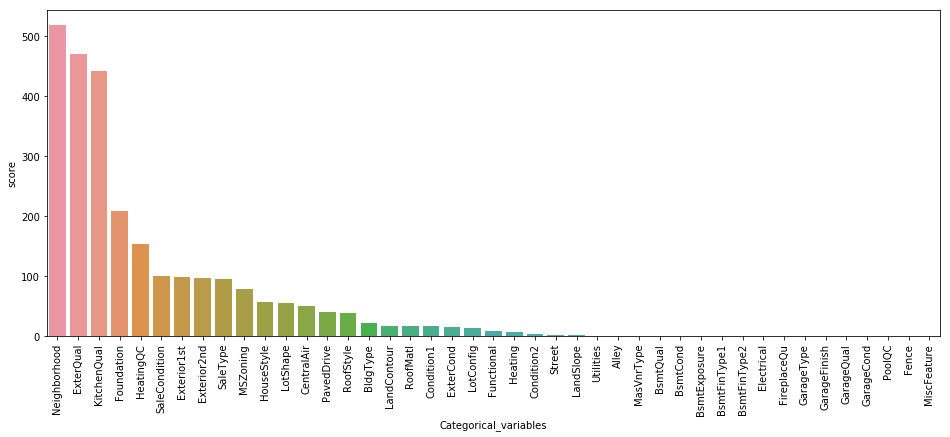

In [27]:
Categorical_data['SalePrice'] = train_data.SalePrice.values
anv_p_val=ANOVA_test(Categorical_data)
anv_p_val['score']=np.log(1./anv_p_val['p_value'].values)
plt.figure(figsize=(16, 6))
sns.barplot(data=anv_p_val, x = 'Categorical_variables', y='score') 
plt.xticks(rotation=90) 
plt 

We can observe from the above barplot that the categorical feature 'Neighborhood' is the most important feature in predicting the SalePrice of the house. That means houses are more expensive in good neighborhood.

#### Neighborhood vs SalePrice

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

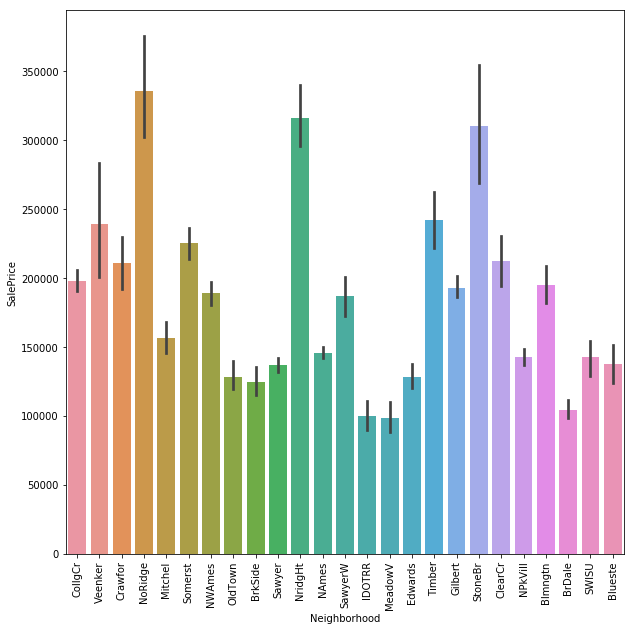

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x = train_data.Neighborhood, y = train_data.SalePrice)
                            
plt.xticks(rotation=90)

NoRidge Neiborhood is more expensive

#### Quality of the material on the exterior vs SalePrice

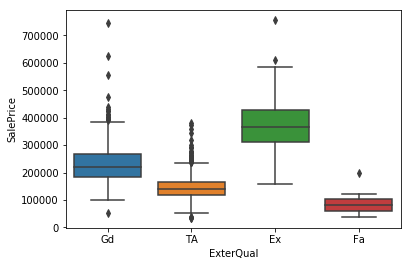

In [29]:
sns.boxplot(x = train_data.ExterQual, y = train_data.SalePrice)

Houses with Excellent and good quality of matrial on the exterior are more expensive compared to that of Average and Fair.

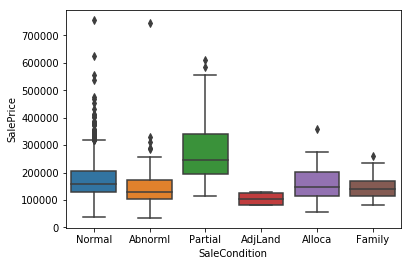

In [30]:
sns.boxplot(x = train_data.SaleCondition, y = train_data.SalePrice)

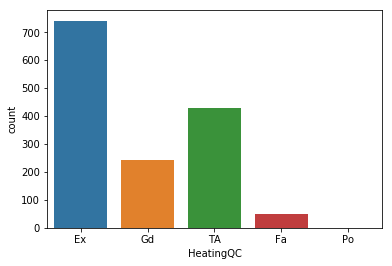

In [31]:
sns.countplot(train_data.HeatingQC)

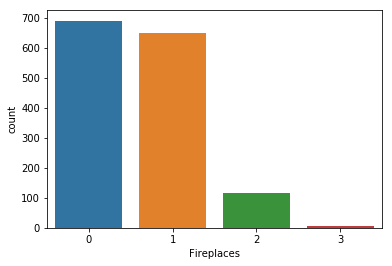

In [32]:
sns.countplot(train_data.Fireplaces)

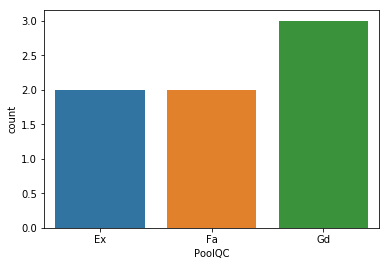

In [33]:
sns.countplot(train_data.PoolQC)

From the plots of HeatingQC,Fireplaces and PoolQC we can say that almost all the houses has Heating and Fireplace facilities but only 7 houses have pools.This means that in this place winters will have very less temperatures which makes the Heating or Fireplace a mandatory requirement

Partial SaleCondition here means home was not completed when last assessed (associated with New Homes).SalePrices of houses with  Partial Sale condition are more

#### Data Preprocessing

##### Removing outliers

from the above plots, the variable 'GrLivArea' has outliers  after the value 4000. We remove these outliers

In [34]:
train_data.drop(train_data[train_data['GrLivArea'] > 4000].index, inplace=True)

##### Handling Missing values

Considering the features where missing values are more than 30%.

In [35]:
miss_values[miss_values*100>30]

FireplaceQu    0.472603
Fence          0.807534
Alley          0.937671
MiscFeature    0.963014
PoolQC         0.995205
dtype: float64

Now let us analyse the meaning of these missing values for each variable and do they really make sense.In the above features where missed values are more than 30%, NA in FireplaceQu means No Fireplace, NA in Fence means No Fence, NA in Alley means No alley access to the property, NA in MiscFeatures means No Miscillaneous feature, NA in PoolQC means No pool. missing values in the above 5 variables make sense. So we handle these missing values by  filling these missing values with something that captures this information. And also when there is no pool i.e PoolQC is NA,then PoolArea should be 0. So if the corresponding PoolArea has missing value as NA, we should handle it by filling 0.Similarly if any of the 3 variables 'GarageFinish' or 'GarageQual' or 'GarageCond' are NA that means no garage.Hence remaining 2 will be NA and 'GarageCars' and 'GarageArea' should be 0.

In [36]:
miss_values[(miss_values*100>0)&(miss_values*100<30)]

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
dtype: float64

As described in the instance of Garage related variables, missing values may indicate there is no Garage. So we can replace the missing values as 'None'

In [37]:
impute_None=train_data[['Alley','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1', 
                        'BsmtFinType2','FireplaceQu','GarageType','GarageFinish', 'GarageQual', 
                        'GarageCond','PoolQC','Fence','MiscFeature']]


In [38]:
train_data.update(impute_None.fillna("None"))

for numeric features, impute the missing values to 0

In [39]:
impute_zero=train_data[['BsmtFullBath','BsmtHalfBath', 'TotalBsmtSF',
                        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','GarageArea','GarageCars']]
train_data.update(impute_zero.fillna(0.0))

for time variables like GarageYrBlt, we will fill the year in which that house was built because practically a garage will be built along with the house

In [40]:
train_data.update(train_data['GarageYrBlt'].fillna(train_data.YearBuilt))

In [41]:
miss_values=train_data.isnull().sum()/len(train_data)

In [42]:
miss_values[miss_values>0]

LotFrontage    0.177885
MasVnrType     0.005495
MasVnrArea     0.005495
Electrical     0.000687
dtype: float64

These values may be missimg at random (for example data may not be entered my mistake).We can handle these type of missing values by deleting them or imputing them with mean/median/mode or leaving them as is.

For categorical variables, we impute the missing values by mode because the missing values are at random and there is more chance of it being the most frequent value which is nothing but mode.

In [43]:
impute_mode = ['Electrical', 'MasVnrType']
train_data.loc[:, impute_mode] = train_data[impute_mode].fillna(train_data[impute_mode].mode().iloc[0])

In [44]:
miss_values=train_data.isnull().sum()/len(train_data)
miss_values[miss_values>0]

LotFrontage    0.177885
MasVnrArea     0.005495
dtype: float64

As the 'MasVnrArea' and 'LotFrontage' are skewed to right which means there are outliers, it is better to impute missing values with median instead of mean as the median is less senitive to outliers compared to mean.

In [45]:
#Group median of MasVnrArea by MasVnrType
MasVnr_data=train_data.pivot_table(values='MasVnrArea',index='MasVnrType',aggfunc='median')
MasVnr_data

,MasVnrArea
MasVnrType,
BrkCmn,192.0
BrkFace,201.0
None,0.0
Stone,202.5


In [46]:

def impute_median_MasVnr(MasVnrcols):
    MVArea=MasVnrcols[0]
    MVType=MasVnrcols[1]
    
    if pd.isnull(MVArea):
        
        return MasVnr_data['MasVnrArea'][MasVnr_data.index==MVType]
    else:
        
        return MVArea

In [47]:
print('#missing values in the training data initially: %d'%sum(train_data["MasVnrArea"].isnull()))

#missing values in the training data initially: 8


In [48]:
#impute median
train_data["MasVnrArea"] = train_data[["MasVnrArea","MasVnrType"]].apply(impute_median_MasVnr,axis=1).astype(float)

In [49]:
print('#missing values after imputing median: %d'%sum(train_data["MasVnrArea"].isnull()))

#missing values after imputing median: 0


Now the missing values in MasVnrAreaa are imputed with median. Now we will impute median in the same way for LotFrontage

In [50]:
#group by neighborhood

Lot_data=train_data.pivot_table(values='LotFrontage',index='Neighborhood',aggfunc='median')
Lot_data

,LotFrontage
Neighborhood,
Blmngtn,43.0
Blueste,24.0
BrDale,21.0
BrkSide,52.0
ClearCr,80.0
CollgCr,70.0
Crawfor,74.0
Edwards,64.5
Gilbert,65.0


In [51]:
def impute_median_Lot(lotdata):
    lot_front=lotdata[0]
    neighborhood=lotdata[1]
    if pd.isnull(lot_front):
        
        return Lot_data['LotFrontage'][Lot_data.index==neighborhood]
    else:
        
        return lot_front

In [52]:
print('#missing values in the training data initially: %d'%sum(train_data["LotFrontage"].isnull()))

#missing values in the training data initially: 259


In [53]:
#impute median
train_data["LotFrontage"] = train_data[["LotFrontage","Neighborhood"]].apply(impute_median_Lot,axis=1).astype(float)

In [54]:
print('#missing values after imputing median: %d'%sum(train_data["LotFrontage"].isnull()))

#missing values after imputing median: 0


Now check for the skewness of the columns with numeric data

In [55]:
num_col=train_data.dtypes[train_data.dtypes!="object"].index[1:]#not cosidering the variable 'Id'
numeric_skew=train_data[num_col].apply(lambda x : pd.DataFrame.skew(x))

We will apply logarithmic transformation to numeric features which are very much skewed (greater than 0.75)

In [56]:
numeric_skew[numeric_skew>0.75]

MSSubClass        1.406366
LotFrontage       1.538478
LotArea          12.587561
MasVnrArea        2.657499
BsmtFinSF2        4.248587
BsmtUnfSF         0.921759
1stFlrSF          0.867081
2ndFlrSF          0.777866
LowQualFinSF      8.998564
GrLivArea         0.835192
BsmtHalfBath      4.128967
KitchenAbvGr      4.481366
WoodDeckSF        1.551271
OpenPorchSF       2.339846
EnclosedPorch     3.084454
3SsnPorch        10.289866
ScreenPorch       4.115641
PoolArea         17.522613
MiscVal          24.443364
SalePrice         1.565959
dtype: float64

In [57]:
numeric_skew=numeric_skew[numeric_skew>0.75].index

In [58]:
train_data[numeric_skew]=np.log1p(train_data[numeric_skew])

Now we will drop the features that are highly correlated to each other,as discuused in above correlation heatmap

In [59]:
train_data.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis =1, inplace = True)

As most of the machine learning algorithms expect numerical features,we have to encode the ordinal and categorical features with numeric values.

In [60]:
#non numeric features
train_data.select_dtypes(include = [object]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Now let us deal with ordinal features.

Ordinal fetures are:

LotShape, Utilities, LandSlope, OverallQual, OverallCond, ExterQual ,ExterCond ,BsmtQual, BsmtCond ,BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical ,KitchenQual, Functional, FireplaceQu, GarageFinish ,GarageQual ,GarageCond ,PavedDrive, PoolQC ,Fence

the features 'OverallQual' and 'OverallCond' are already encoded as below.

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor


In [61]:
train_data.LotShape=train_data.LotShape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
train_data.Utilities = train_data.Utilities.replace({'AllPub':0, 'NoSeWa':1})
train_data.LandSlope = train_data.LandSlope.replace({'Gtl':0, 'Mod':1, 'Sev':2})
train_data.ExterQual = train_data.ExterQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
train_data.ExterCond = train_data.ExterCond.replace({'TA':0, 'Gd':1, 'Fa':2, 'Po':3,'Ex':4})
train_data.BsmtQual = train_data.BsmtQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'None':3,'Fa':4})
train_data.BsmtCond = train_data.BsmtCond.replace({'TA':0, 'Gd':1, 'None':2, 'Fa':3,'Po':4})
train_data.BsmtExposure = train_data.BsmtExposure.replace({'No':0, 'Gd':1, 'Mn':2, 'Av':3,'None':4})
train_data.BsmtFinType1 = train_data.BsmtFinType1.replace({'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'None':5, 'LwQ':6})
train_data.BsmtFinType2 = train_data.BsmtFinType2.replace({'Unf':0, 'BLQ':1, 'None':2, 'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
train_data.HeatingQC = train_data.HeatingQC.replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
train_data.Electrical = train_data.Electrical.replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})
train_data.KitchenQual = train_data.KitchenQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
train_data.Functional = train_data.Functional.replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6})
train_data.FireplaceQu = train_data.FireplaceQu.replace({'None':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
train_data.GarageFinish = train_data.GarageFinish.replace({'RFn':0, 'Unf':1, 'Fin':2, 'None':3})
train_data.GarageQual = train_data.GarageQual.replace({'TA':0, 'Fa':1, 'Gd':2, 'None':3, 'Ex':4, 'Po':5})
train_data.GarageCond = train_data.GarageCond.replace({'TA':0, 'Fa':1, 'None':2, 'Gd':3, 'Po':4, 'Ex':5})
train_data.PavedDrive = train_data.PavedDrive.replace({'Y':0, 'N':1, 'P':2})
train_data.PoolQC = train_data.PoolQC.replace({'None':0, 'Ex':1, 'Fa':2, 'Gd':3})
train_data.Fence = train_data.Fence.replace({'None':0, 'MnPrv':1, 'GdWo':2, 'GdPrv':3, 'MnWw':4})

Now let us handle categorical features.

Categorical fetures are:

MSZoning ,Street, Alley ,LandContour, LotConfig, Neighborhood ,Condition1 ,Condition2, BldgType, HouseStyle, RoofStyle, RoofMat1 ,Exterior1st, Exterior2nd, MasVnrType, Foundation ,Heating ,CentralAir ,GarageType, MiscFeature, SaleType, SaleCondition

In [62]:
label_encoder=LabelEncoder()
cat_features= ['MSZoning', 'Street', 'Alley' ,'LandContour' ,'LotConfig', 'Neighborhood', 'Condition1' ,'Condition2', 'BldgType','HouseStyle' ,'RoofStyle', 'RoofMatl' ,'Exterior1st' ,'Exterior2nd', 'MasVnrType', 'Foundation' ,'Heating','CentralAir', 'GarageType' ,'MiscFeature' ,'SaleType' ,'SaleCondition']
for feature in cat_features:
    train_data[feature]=label_encoder.fit_transform(train_data[feature])

In [63]:
train_data["Alley"]

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      0
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1430    1
1431    1
1432    0
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    2
1455    1
1456    1
1457    1
1458    1
1459    1
Name: Alley, Length: 1456, dtype: int32

After Label encoding, one of the categorical feature is encoded as shown above(0,1,2).This has nothing to do with the magnitude of the encoding.That means all the three levels should be given equal priority.So we create a dummy encoding.

In [64]:
#keep copy of training data with no missing values and label encoding

train_data_new=train_data

In [65]:
train_data=pd.get_dummies(train_data,columns=cat_features)

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 219 entries, Id to SaleCondition_5
dtypes: float64(20), int64(36), uint8(163)
memory usage: 880.1 KB


We can observe only numeric types and categorical features are encoded

In [67]:
#check if there are missing values after handling the missing values
miss_values_after=train_data.isnull().sum()/len(train_data)
miss_values_after=miss_values_after[miss_values_after>0]
print(miss_values_after)

Series([], dtype: float64)


There are no missing values.

Analyze the test data in the same way and apply data preprocessing on test data

In [68]:
#display the first five columns of train data
test_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [69]:
print("size of test data :",test_data.shape)

size of test data : (1459, 80)


In [70]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

test data has 37 numerical and 43 categorical variables

In [71]:
#check for missing values
miss_values_test=test_data.isnull().sum()/len(test_data)
miss_values_test=miss_values_test[miss_values_test>0]
miss_values_test.sort_values(inplace=True)

#print only columns having missed values
print("missing values in each column : \n",miss_values_test)

missing values in each column : 
 TotalBsmtSF     0.000685
GarageArea      0.000685
GarageCars      0.000685
KitchenQual     0.000685
BsmtUnfSF       0.000685
BsmtFinSF2      0.000685
BsmtFinSF1      0.000685
SaleType        0.000685
Exterior1st     0.000685
Exterior2nd     0.000685
Functional      0.001371
Utilities       0.001371
BsmtHalfBath    0.001371
BsmtFullBath    0.001371
MSZoning        0.002742
MasVnrArea      0.010281
MasVnrType      0.010966
BsmtFinType2    0.028787
BsmtFinType1    0.028787
BsmtQual        0.030158
BsmtExposure    0.030158
BsmtCond        0.030843
GarageType      0.052090
GarageFinish    0.053461
GarageQual      0.053461
GarageCond      0.053461
GarageYrBlt     0.053461
LotFrontage     0.155586
FireplaceQu     0.500343
Fence           0.801234
Alley           0.926662
MiscFeature     0.965045
PoolQC          0.997944
dtype: float64


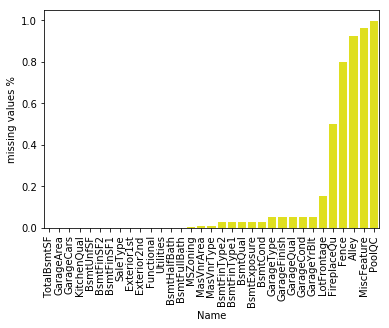

In [72]:
#display the missing values
miss_test_plot=sns.barplot(x=miss_values_test.index,y=miss_values_test.values,color='yellow')
miss_test_plot.set(xlabel='Name',ylabel='missing values %')
pltl.xticks(rotation=90)
pltl.show()

PoolQC has more percentage of missing values followed by MiscFeature and Alley

##### Removing outliers

We remove the outliers in 'GrLivArea' in the same way as above

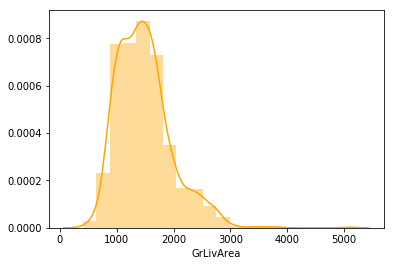

In [73]:
sns.distplot(test_data['GrLivArea'],kde=True,color='orange',bins=20)


The distribution is skewed to the right that means it has outliers after the value greater than 4000

In [74]:
test_data.drop(test_data[test_data['GrLivArea'] > 4000].index, inplace=True)

##### Missing values in test Data

Considering the features where missing values are more than 30%.

In [75]:
miss_values_test[miss_values_test*100>30]

FireplaceQu    0.500343
Fence          0.801234
Alley          0.926662
MiscFeature    0.965045
PoolQC         0.997944
dtype: float64

In [76]:
miss_values[(miss_values*100>0)&(miss_values*100<30)]

LotFrontage    0.177885
MasVnrArea     0.005495
dtype: float64

Missing values may be meaning ful in few cases as described above (in case of Garage). So we can impute None in such cases

In [77]:
impute_None_test=test_data[['Alley','BsmtCond','BsmtQual','BsmtExposure','BsmtFinType1', 
                        'BsmtFinType2','FireplaceQu','GarageType','GarageFinish', 'GarageQual', 
                        'GarageCond','PoolQC','Fence','MiscFeature']]

In [78]:
test_data.update(impute_None_test.fillna("None"))

In [79]:
#for numeric features, impute the missing values to 0
impute_zero_test=test_data[['BsmtFullBath','BsmtHalfBath', 'TotalBsmtSF',
                        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','GarageArea','GarageCars']]
test_data.update(impute_zero_test.fillna(0.0))

In [80]:
test_data.update(test_data['GarageYrBlt'].fillna(test_data.YearBuilt))

In [81]:
miss_values_test=test_data.isnull().sum()/len(test_data)

In [82]:
miss_values_test[miss_values_test>0]

MSZoning       0.002743
LotFrontage    0.155693
Utilities      0.001372
Exterior1st    0.000686
Exterior2nd    0.000686
MasVnrType     0.010974
MasVnrArea     0.010288
KitchenQual    0.000686
Functional     0.001372
SaleType       0.000686
dtype: float64

For categorical variables, we impute the missing values by mode because the missing values

In [83]:
impute_mode_test = ['MSZoning', 'MasVnrType','Functional','Utilities','Exterior1st','Exterior2nd','KitchenQual','SaleType']
test_data.loc[:, impute_mode_test] = test_data[impute_mode_test].fillna(test_data[impute_mode_test].mode().iloc[0])

In [84]:
miss_values_test=test_data.isnull().sum()/len(test_data)

In [85]:
miss_values_test[miss_values_test>0]

LotFrontage    0.155693
MasVnrArea     0.010288
dtype: float64

As the 'MasVnrArea' and 'LotFrontage' are skewed to right which means there are outliers, it is better to impute missing values with median instead of mean as the median is less senitive to outliers compared to mean.

In [86]:
#Group median of MasVnrArea by MasVnrType
MasVnr_data_test=test_data.pivot_table(values='MasVnrArea',index='MasVnrType',aggfunc='median')
MasVnr_data_test

,MasVnrArea
MasVnrType,
BrkCmn,98.5
BrkFace,203.0
None,0.0
Stone,195.0


In [87]:
#impute median
test_data["MasVnrArea"] = test_data[["MasVnrArea","MasVnrType"]].apply(impute_median_MasVnr,axis=1).astype(float)

In [88]:
print('#missing values after imputing median: %d'%sum(test_data["MasVnrArea"].isnull()))

#missing values after imputing median: 0


In [89]:
#group by neighborhood

Lot_data=test_data.pivot_table(values='LotFrontage',index='Neighborhood',aggfunc='median')
Lot_data

,LotFrontage
Neighborhood,
Blmngtn,43.0
Blueste,24.0
BrDale,21.0
BrkSide,51.0
ClearCr,87.0
CollgCr,70.0
Crawfor,66.0
Edwards,64.0
Gilbert,63.0


In [90]:
#impute median
test_data["LotFrontage"] = test_data[["LotFrontage","Neighborhood"]].apply(impute_median_Lot,axis=1)

In [91]:
print('#missing values after imputing median: %d'%sum(test_data["LotFrontage"].isnull()))

#missing values after imputing median: 0


In [92]:
#check for the skewness of the columns with numeric data
num_col_test=test_data.dtypes[test_data.dtypes!="object"].index[1:]#not cosidering the variable 'Id'
numeric_skew_test=test_data[num_col_test].apply(lambda x : pd.DataFrame.skew(x))

In [93]:
#apply logarithmic transformation to numeric features which are very much skewed (greater than 0.75)
numeric_skew_test[numeric_skew_test>0.75]

MSSubClass        1.345947
LotArea           3.093650
MasVnrArea        2.488085
BsmtFinSF1        0.906862
BsmtFinSF2        4.041345
BsmtUnfSF         0.922278
1stFlrSF          1.012444
2ndFlrSF          0.911858
LowQualFinSF     16.161666
GrLivArea         0.914353
BsmtHalfBath      3.808012
KitchenAbvGr      4.077420
TotRmsAbvGrd      0.751094
Fireplaces        0.820906
WoodDeckSF        2.134238
OpenPorchSF       2.633519
EnclosedPorch     4.667490
3SsnPorch        12.519851
ScreenPorch       3.786701
PoolArea         20.189930
MiscVal          18.939445
dtype: float64

In [94]:
numeric_skew_test=numeric_skew_test[numeric_skew_test>0.75].index
test_data[numeric_skew_test]=np.log1p(test_data[numeric_skew_test])

In [95]:
#drop the features that are dropped in training data
test_data.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis =1, inplace = True)

In [96]:
#encode the ordinal and categorical features with numeric values
test_data.select_dtypes(include = [object]).columns

Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

Ordinal Features are:

LotShape, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence

In [97]:
test_data.LotShape=test_data.LotShape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})
test_data.Utilities = test_data.Utilities.replace({'AllPub':0, 'NoSeWa':1})
test_data.LandSlope = test_data.LandSlope.replace({'Gtl':0, 'Mod':1, 'Sev':2})
test_data.ExterQual = test_data.ExterQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
test_data.ExterCond = test_data.ExterCond.replace({'TA':0, 'Gd':1, 'Fa':2, 'Po':3,'Ex':4})
test_data.BsmtQual = test_data.BsmtQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'None':3,'Fa':4})
test_data.BsmtCond = test_data.BsmtCond.replace({'TA':0, 'Gd':1, 'None':2, 'Fa':3,'Po':4})
test_data.BsmtExposure = test_data.BsmtExposure.replace({'No':0, 'Gd':1, 'Mn':2, 'Av':3,'None':4})
test_data.BsmtFinType1 = test_data.BsmtFinType1.replace({'GLQ':0, 'ALQ':1, 'Unf':2, 'Rec':3, 'BLQ':4, 'None':5, 'LwQ':6})
test_data.BsmtFinType2 = test_data.BsmtFinType2.replace({'Unf':0, 'BLQ':1, 'None':2, 'ALQ':3, 'Rec':4, 'LwQ':5, 'GLQ':6})
test_data.HeatingQC = test_data.HeatingQC.replace({'Ex':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4})
test_data.Electrical = test_data.Electrical.replace({'SBrkr':0, 'FuseF':1, 'FuseA':2, 'FuseP':3, 'Mix':4})
test_data.KitchenQual = test_data.KitchenQual.replace({'Gd':0, 'TA':1, 'Ex':2, 'Fa':3})
test_data.Functional = test_data.Functional.replace({'Typ':0, 'Min1':1, 'Maj1':2, 'Min2':3, 'Mod':4, 'Maj2':5, 'Sev':6})
test_data.FireplaceQu = test_data.FireplaceQu.replace({'None':0, 'TA':1, 'Gd':2, 'Fa':3, 'Ex':4, 'Po':5})
test_data.GarageFinish = test_data.GarageFinish.replace({'RFn':0, 'Unf':1, 'Fin':2, 'None':3})
test_data.GarageQual = test_data.GarageQual.replace({'TA':0, 'Fa':1, 'Gd':2, 'None':3, 'Ex':4, 'Po':5})
test_data.GarageCond = test_data.GarageCond.replace({'TA':0, 'Fa':1, 'None':2, 'Gd':3, 'Po':4, 'Ex':5})
test_data.PavedDrive = test_data.PavedDrive.replace({'Y':0, 'N':1, 'P':2})
test_data.PoolQC = test_data.PoolQC.replace({'None':0, 'Ex':1, 'Fa':2, 'Gd':3})
test_data.Fence = test_data.Fence.replace({'None':0, 'MnPrv':1, 'GdWo':2, 'GdPrv':3, 'MnWw':4})

Categorical features are:

'MSZoning', 'Street', 'Alley', 'LandContour','LotConfig', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation','Heating', 'CentralAir','GarageType', 'MiscFeature','SaleType', 'SaleCondition'

In [98]:
label_encoder=LabelEncoder()
cat_features_test= ['MSZoning', 'Street', 'Alley' ,'LandContour' ,'LotConfig', 'Neighborhood', 'Condition1' ,'Condition2', 'BldgType','HouseStyle' ,'RoofStyle', 'RoofMatl' ,'Exterior1st' ,'Exterior2nd', 'MasVnrType', 'Foundation' ,'Heating','CentralAir', 'GarageType' ,'MiscFeature' ,'SaleType' ,'SaleCondition']
for feature in cat_features_test:
    test_data[feature]=label_encoder.fit_transform(test_data[feature])

In [99]:
#Dummy encoding

test_data=pd.get_dummies(test_data,columns=cat_features_test)

In [100]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1458
Columns: 205 entries, Id to SaleCondition_5
dtypes: float64(23), int64(29), object(3), uint8(150)
memory usage: 851.4+ KB


all the non numeric features in the test data are encoded

In [101]:
#check if there are missing values after handling the missing values in test data
miss_test_after=test_data.isnull().sum()/len(test_data)
miss_test_after=miss_test_after[miss_test_after>0]
print(miss_test_after)

Series([], dtype: float64)


All the missing values in the test data are handled and now there are no missing values in the test data

In [102]:
#Applying Linear Regression
train_data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,1,4.110874,4.189655,9.042040,0,0,0,7,5,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,3.044522,4.394449,9.169623,0,0,0,6,8,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,4.110874,4.234107,9.328212,1,0,0,7,5,2001,...,0,0,0,1,0,0,0,0,1,0
3,4,4.262680,4.110874,9.164401,1,0,0,7,5,1915,...,0,0,0,1,1,0,0,0,0,0
4,5,4.110874,4.442651,9.565284,1,0,0,8,5,2000,...,0,0,0,1,0,0,0,0,1,0


In [103]:
#splitting the training data to input features and output
train_features_X=train_data.loc[:, train_data.columns != 'SalePrice']
train_y=train_data.loc[:,train_data.columns=='SalePrice']


In [104]:
#removing the column 'Id' as it does not impact Saleprice
train_features_X=train_features_X.drop(['Id'], axis=1)


In [105]:
#removing the column 'Id' from test data
test_features_X=test_data.loc[:, test_data.columns != 'Id']
x_test=test_features_X

In [106]:

X=train_features_X
y=train_y

In [107]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(normalize=True)
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [108]:
#predicting on the test set

y_pred=regressor.predict(X)

We use k fold cross validation and regularization techniques to avoid overfitting

In [109]:
#perform k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
scores = cross_val_score(regressor, X, y, cv=10,scoring='neg_mean_squared_error')
scores = np.sqrt(np.abs(scores))
print("Mean Cv_score with all features :",str(np.mean(scores)))
print("std Cv_score with all features :",str(np.std(scores)))

Mean Cv_score : 491789688230.4953
std Cv_score : 703445076009.7341


In [110]:
print("RMSE : ", np.sqrt(mean_squared_error(y, y_pred)))

RMSE :  0.09391132065496044


alpha is the  regularization parameter that decides how much we want to penalize the flexibility of our model.The higher the regularization the less prone our model will be to overfit.But it is very critical to select proper alpha so that it will not result in underfitting

In [115]:
#Ridge Regression
from sklearn.linear_model import Ridge, RidgeCV
ridge_regressor = Ridge()
alpha_values = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
def rmse_ridge(ridge_reg):
    rmse= np.sqrt(-cross_val_score(ridge_reg,X,y,
                                   scoring="neg_mean_squared_error", cv = 10))
    return(rmse)
ridge_rmse= [rmse_ridge(Ridge(alpha = alpha)).mean()for alpha in alpha_values]


cv_ridge = pd.Series(ridge_rmse, index = alpha_values)
#cv_ridge

In [116]:

cv_ridge.min()

0.11040271757571077

In [117]:
ridge_alpha_reg = Ridge(alpha=0.11)
ridge_alpha_reg.fit(X,y)

scores_ridge = cross_val_score(ridge_alpha_reg, X, y, cv=10,scoring='neg_mean_squared_error')
scores_ridge = np.sqrt(np.abs(scores_ridge))
print("Mean Cv_score with rigde regularization :",str(np.mean(scores_ridge)))
print("std Cv_score with ridge regularization:",str(np.std(scores_ridge)))

Mean Cv_score : 0.11508241490415035
std Cv_score : 0.01499426740032005


By looking at the mean Cv_score we can say that the error is less when used ridge regression.So our model performs better when ridge regression is used.

Till now we have used all the features to predict the target variable.

Now we will select the features that has huge impact on target variable.

We use Filter method based on correlation  for feature selection here.



In the filter method based on correlation, we will consider the features that are highly correlated(>0.5) with target variable and remove remaining.In these highly correlated features,we will check if any two independent variables are highly correlated to each other which leads to redundancy and we will keep one of those variables and remove the other.
Fr nummerical variables we pick the features by analysing the correlation matrix (from heatmap) and for categorical features,we select the important features by performing ANOVA test.

As analysed from the correlation from the heatmap and ANOVA test in the above sections and considering top few features, we have got the following features

OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,Neighborhood,ExterQual,KitchenQual,Foundation,HeatingQC,SaleCondition

In [120]:
X_filter=train_data_new[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','YearRemodAdd','Neighborhood','ExterQual','KitchenQual','Foundation','HeatingQC','SaleCondition']]

In [122]:
X_filter.shape

(1456, 13)

In [124]:
label_encoder=LabelEncoder()
cat_features_select= ['Neighborhood','ExterQual','KitchenQual','Foundation','HeatingQC','SaleCondition']
for feature in cat_features_select:
    X_filter[feature]=label_encoder.fit_transform(X_filter[feature])

C:\Users\alekh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [125]:
#Dummy encoding

X_filter=pd.get_dummies(X_filter,columns=cat_features_select)

In [126]:
X_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 57 columns):
OverallQual        1456 non-null int64
GrLivArea          1456 non-null float64
GarageCars         1456 non-null int64
TotalBsmtSF        1456 non-null int64
FullBath           1456 non-null int64
YearBuilt          1456 non-null int64
YearRemodAdd       1456 non-null int64
Neighborhood_0     1456 non-null uint8
Neighborhood_1     1456 non-null uint8
Neighborhood_2     1456 non-null uint8
Neighborhood_3     1456 non-null uint8
Neighborhood_4     1456 non-null uint8
Neighborhood_5     1456 non-null uint8
Neighborhood_6     1456 non-null uint8
Neighborhood_7     1456 non-null uint8
Neighborhood_8     1456 non-null uint8
Neighborhood_9     1456 non-null uint8
Neighborhood_10    1456 non-null uint8
Neighborhood_11    1456 non-null uint8
Neighborhood_12    1456 non-null uint8
Neighborhood_13    1456 non-null uint8
Neighborhood_14    1456 non-null uint8
Neighborhood_15    1456 non-null 

In [127]:
from sklearn.linear_model import LinearRegression
regressor_selection=LinearRegression(normalize=True)
regressor_selection.fit(X_filter,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [128]:
#perform k-fold cross validation
scores_select = cross_val_score(regressor_selection, X_filter, y, cv=10,scoring='neg_mean_squared_error')
scores_select = np.sqrt(np.abs(scores_select))
print("Mean Cv_score with selected features :",str(np.mean(scores_select)))
print("std Cv_score with selected features :",str(np.std(scores_select)))

Mean Cv_score with selected features : 38573603786.21379
std Cv_score with selected features : 115720811358.23236


In [129]:
y_pre_select=regressor_selection.predict(X_filter)
print("RMSE : ", np.sqrt(mean_squared_error(y, y_pre_select)))

RMSE :  0.13170360048934357


From the above results, it can be observed that model performs better with selected features than with all features.Model performs even better with regularization.